# Сензорски системи

## Лабораториска вежба бр. 2

### Алгоритми за предикција на временски серии од сензорски податоци



*Податоците се преземени од https://data.melbourne.vic.gov.au/Environment/Sensor-readings-with-temperature-light-humidity-ev/ez6b-syvw*

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import statsmodels.api as sm
import math

In [31]:
df = pd.read_csv("data.csv")
df

#34923 rows × 10 columns

,timestamp,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg,model,latitude,longitude,elevation,location,rowid,Position
0,12/15/2014 1:40,0013a20040b4b755,1,508,21.6,21.6,21.6,96.4,96.4,96.4,41.2,41.2,41.2,ENV,-37.813408,144.979492,30.10,Fitzroy Gardens,508-20141215014000,NaN
1,12/15/2014 1:40,0013a20040b516ed,1,505,23.2,23.2,23.2,93.5,93.5,93.5,48.3,48.3,48.3,ENV,-37.813073,144.980406,29.91,Fitzroy Gardens,505-20141215014000,NaN
2,12/15/2014 1:45,0013a20040b516f6,1,507,21.6,21.6,21.6,97.2,97.2,97.2,44.8,44.8,44.8,ENV,-37.814922,144.982258,38.79,Fitzroy Gardens,507-20141215014500,NaN
3,12/15/2014 1:45,0013a20040b5b318,1,502,21.3,21.3,21.3,97.4,97.4,97.4,45.3,45.3,45.3,ENV,-37.814610,144.979018,22.57,Fitzroy Gardens,502-20141215014500,NaN
4,12/15/2014 1:45,0013a20040b315ec,1,501,22.9,22.9,22.9,97.4,97.4,97.4,43.1,43.1,43.1,ENV,-37.814808,144.980999,29.96,Fitzroy Gardens,501-20141215014500,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56565,6/5/2015 3:55,0013a20040b31583,1,509,8.1,8.1,8.1,2.6,2.6,2.6,63.4,63.4,63.4,ENV,-37.819904,144.940485,0.03,Docklands Library,509-20150605035500,NaN
56566,6/5/2015 4:05,0013a20040b31571,1,510,7.4,7.4,7.4,3.9,3.9,3.9,54.4,54.4,54.4,ENV,-37.819712,144.941325,2.74,Docklands Library,510-20150605040500,NaN
56567,6/5/2015 4:05,0013a20040b31583,1,509,8.1,8.1,8.1,2.6,2.6,2.6,63.9,63.9,63.9,ENV,-37.819904,144.940485,0.03,Docklands Library,509-20150605040500,NaN
56568,6/5/2015 4:15,0013a20040b3155c,1,506,8.1,8.1,8.1,8.4,8.4,8.4,55.4,55.4,55.4,ENV,-37.820354,144.940482,0.71,Docklands Library,506-20150605041500,NaN


In [32]:
# Finding the sensor with most measurements

column_mid = df['mac']

dictionary = dict()
for data in column_mid:
    dictionary.setdefault(data, 0)
    dictionary[data] += 1
dictionary

{'0013a20040b4b755': 2728,
 '0013a20040b516ed': 2915,
 '0013a20040b516f6': 2918,
 '0013a20040b5b318': 2725,
 '0013a20040b315ec': 2903,
 '0013a20040b3155c': 6626,
 '0013a20040b5b337': 4598,
 '0013a20040b31571': 12038,
 '0013a20040b31583': 19119}

In [33]:
data_needed = df.loc[df['mac'] == '0013a20040b31583']
data_needed

# 19119 rows x 20 columns

,timestamp,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg,model,latitude,longitude,elevation,location,rowid,Position
14,12/15/2014 4:00,0013a20040b31583,1,509,22.9,22.9,22.9,97.8,97.8,97.8,46.6,46.6,46.6,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20141215040000,NaN
18,12/15/2014 4:10,0013a20040b31583,1,509,22.6,22.6,22.6,97.6,97.6,97.6,47.3,47.3,47.3,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20141215041000,NaN
19,12/15/2014 4:20,0013a20040b31583,1,509,22.9,22.9,22.9,97.0,97.0,97.0,46.9,46.9,46.9,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20141215042000,NaN
20,12/15/2014 4:30,0013a20040b31583,1,509,21.9,21.9,21.9,96.7,96.7,96.7,49.1,49.1,49.1,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20141215043000,NaN
22,12/15/2014 5:20,0013a20040b31583,1,509,22.9,22.9,22.9,96.4,96.4,96.4,48.1,48.1,48.1,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20141215052000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56562,6/5/2015 3:35,0013a20040b31583,1,509,8.1,8.1,8.1,2.5,2.5,2.5,63.7,63.7,63.7,ENV,-37.819904,144.940485,0.03,Docklands Library,509-20150605033500,NaN
56564,6/5/2015 3:45,0013a20040b31583,1,509,8.1,8.1,8.1,2.6,2.6,2.6,64.2,64.2,64.2,ENV,-37.819904,144.940485,0.03,Docklands Library,509-20150605034500,NaN
56565,6/5/2015 3:55,0013a20040b31583,1,509,8.1,8.1,8.1,2.6,2.6,2.6,63.4,63.4,63.4,ENV,-37.819904,144.940485,0.03,Docklands Library,509-20150605035500,NaN
56567,6/5/2015 4:05,0013a20040b31583,1,509,8.1,8.1,8.1,2.6,2.6,2.6,63.9,63.9,63.9,ENV,-37.819904,144.940485,0.03,Docklands Library,509-20150605040500,NaN


In [34]:
temp_avg_data = list(data_needed['temp_avg'])

nan = 0

for data in temp_avg_data:
    if math.isnan(data):
        nan+=1
        
print("Data:", len(temp_avg_data))
print("NaN Data:", nan)

Data: 19119
NaN Data: 0


In [35]:
def moving_average_1(serie, threshold):
    transmitted = 0;
    arr = []
    count = 0
    mse = 0.0
    for data in serie:
        if math.isnan(data):
            continue;
        if count==0:
            arr.append(data)
            transmitted += 1
        else:
            if(abs(data - arr[0]) > threshold):
                arr[0] = data
                transmitted += 1
            else:
                #print(data, arr[0])
                error = round((arr[0] - data)**2,5)
                mse += error
        count +=1
    #print(count, transmitted)
    return round(transmitted*1.0/count*100, 2), mse/count

In [36]:
# DEFINING GENERIC MOVING AVERAGE FUNCTION

def moving_average(n, serie, threshold):
    if n == 1:
        return moving_average_1(serie, threshold)  # This generic function is OK even for n = 1 but not enough efficient
    arr = []                                       # That's why in tat case we call a special function
    count = 0;    
    transmitted = 0;
    mse = 0.0

    for data in serie:
        if math.isnan(data):
            continue
        if count >= n:
            moving_avg = round(np.mean(arr),5)
            for i in range(n - 1):
                arr[i] = arr[i + 1]
            if(abs(moving_avg - data) > threshold):
                arr[n-1] = data
                transmitted = transmitted + 1
            else:
                arr[n-1] = moving_avg
                error = round((arr[n-1] - data)**2,5)
                mse = mse + error
        else:
            arr.append(data)
            transmitted = transmitted + 1
        count = count + 1
        
    # print(count, transmitted)    
    return round(transmitted*1.0/count*100, 2), mse/count

In [37]:
# DEFINING THRESHOLD FROM 0 TO 4 WITH STEP 0.1 : 1, 1.1, 1.2, 1.3, 1.4, ..., 4.8, 4.9, 5.0

threshold = [round(x,1) for x in np.arange(0,4.1, 0.1)]

### MOVING AVERAGE (1)

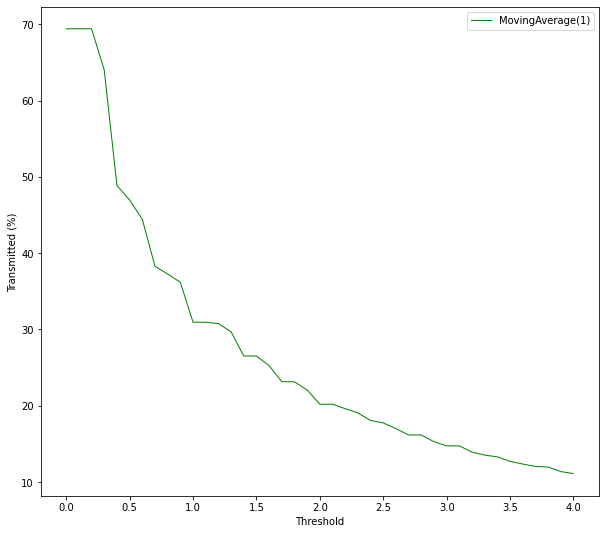

In [38]:
y_axis_transmitted_1 = []
y_axis_mse_1 = []

i = 0;
while(i < len(threshold)):
    transmitted_mse = moving_average(1, temp_avg_data, threshold[i])
    y_axis_transmitted_1.append(transmitted_mse[0])
    y_axis_mse_1.append(transmitted_mse[1])
    # print(threshold[i], transmitted_mse[0], transmitted_mse[1])
    i+=1;

plt.figure(figsize=(10,9))
plt.xlabel('Threshold')
plt.ylabel('Transmitted (%)')
plt.plot(threshold, y_axis_transmitted_1, color='green', linewidth=1, label='MovingAverage(' + str(1) + ')')
plt.legend()
plt.show()

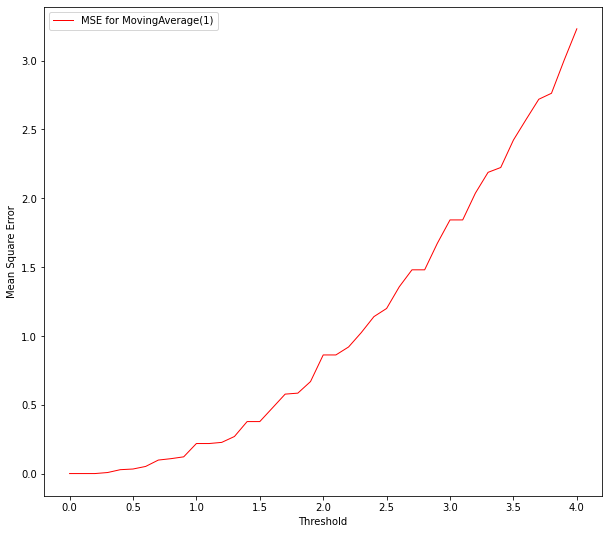

In [39]:
plt.figure(figsize=(10,9))
plt.xlabel('Threshold')
plt.ylabel('Mean Square Error')
plt.plot(threshold, y_axis_mse_1, color='red', linewidth=1, label='MSE for MovingAverage(' + str(1) + ')')
plt.legend()
plt.show()

### MOVING AVERAGE (2)

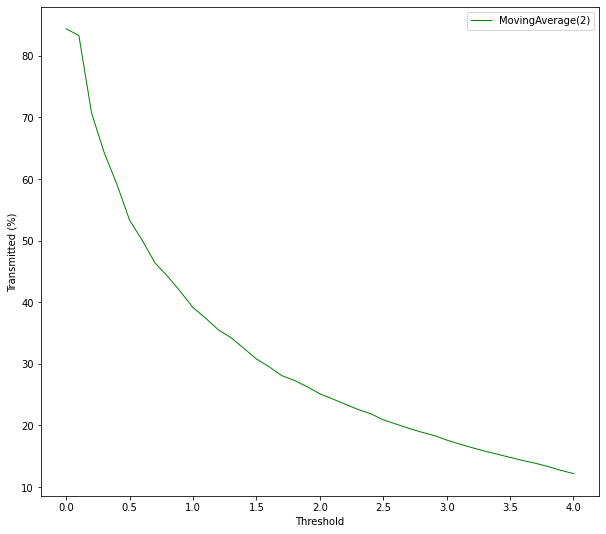

In [40]:
y_axis_transmitted_2 = []
y_axis_mse_2 = []

i = 0;
while(i < len(threshold)):
    transmitted_mse = moving_average(2, temp_avg_data, threshold[i])
    y_axis_transmitted_2.append(transmitted_mse[0])
    y_axis_mse_2.append(transmitted_mse[1])
    # print(threshold[i], transmitted_mse[0], transmitted_mse[1])
    i+=1;

plt.figure(figsize=(10,9))
plt.xlabel('Threshold')
plt.ylabel('Transmitted (%)')
plt.plot(threshold, y_axis_transmitted_2, color='green', linewidth=1, label='MovingAverage(' + str(2) + ')')
plt.legend()
plt.show()

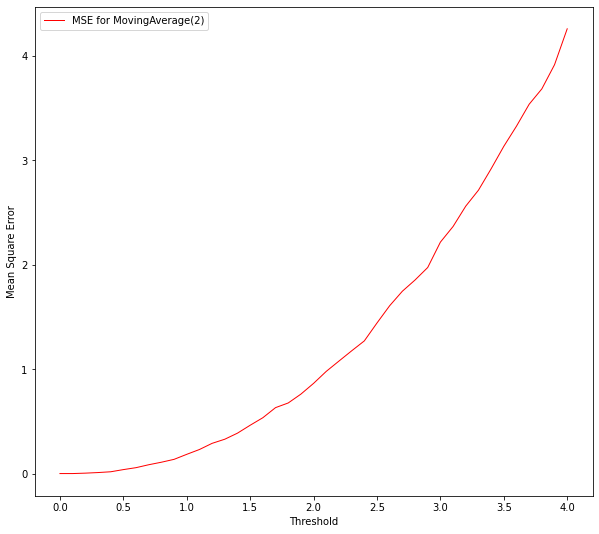

In [41]:
plt.figure(figsize=(10,9))
plt.xlabel('Threshold')
plt.ylabel('Mean Square Error')
plt.plot(threshold, y_axis_mse_2, color='red', linewidth=1, label='MSE for MovingAverage(' + str(2) + ')')
plt.legend()
plt.show()

### MOVING AVERAGE (3)

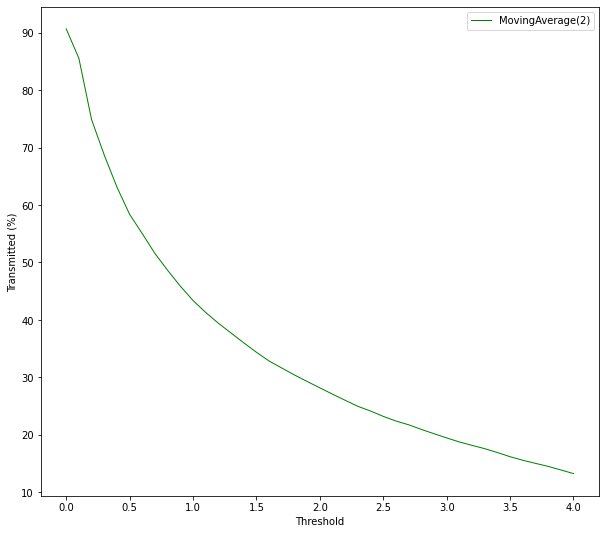

In [42]:
y_axis_transmitted_3 = []
y_axis_mse_3 = []

i = 0;
while(i < len(threshold)):
    transmitted_mse = moving_average(3, temp_avg_data, threshold[i])
    y_axis_transmitted_3.append(transmitted_mse[0])
    y_axis_mse_3.append(transmitted_mse[1])
    # print(threshold[i], transmitted_mse[0], transmitted_mse[1])
    i+=1;

plt.figure(figsize=(10,9))
plt.xlabel('Threshold')
plt.ylabel('Transmitted (%)')
plt.plot(threshold, y_axis_transmitted_3, color='green', linewidth=1, label='MovingAverage(' + str(2) + ')')
plt.legend()
plt.show()

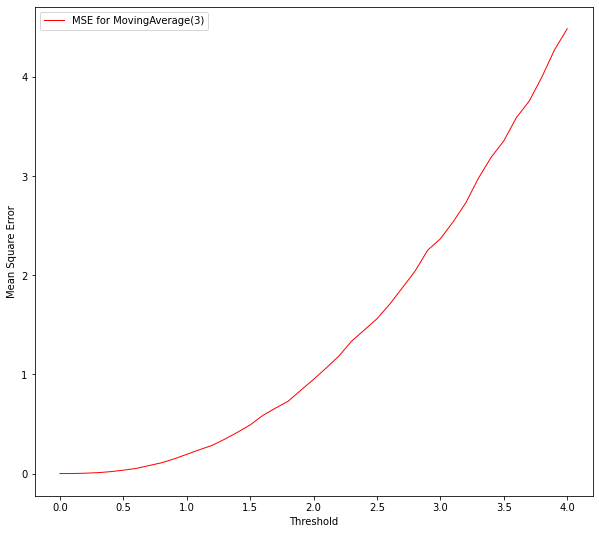

In [43]:
plt.figure(figsize=(10,9))
plt.xlabel('Threshold')
plt.ylabel('Mean Square Error')
plt.plot(threshold, y_axis_mse_3, color='red', linewidth=1, label='MSE for MovingAverage(' + str(3) + ')')
plt.legend()
plt.show()

## МЕТРИКИ
---------------------------------------------------------------------------------------------------------------

### 1) Процент на реализирани трансмисии

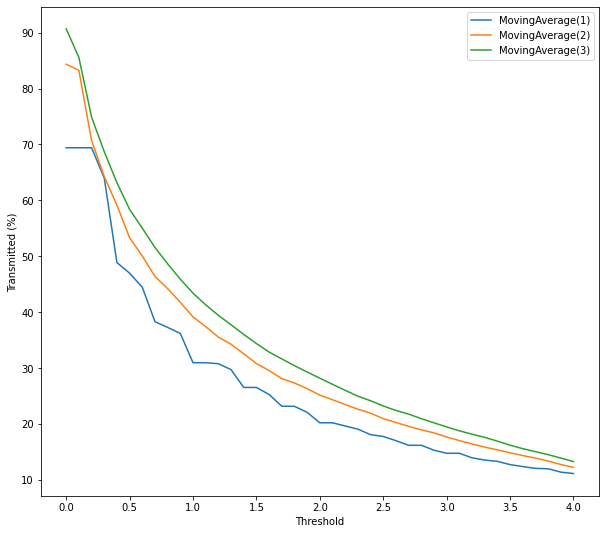

In [44]:
plt.figure(figsize=(10,9))
plt.xlabel('Threshold')
plt.ylabel('Transmitted (%)')

plt.plot(threshold, y_axis_transmitted_1, label="MovingAverage(1)")
plt.plot(threshold, y_axis_transmitted_2, label="MovingAverage(2)")
plt.plot(threshold, y_axis_transmitted_3, label="MovingAverage(3)")

plt.legend()
plt.show()
#print(len(threshold), len(y_axis_transmitted_1), len(y_axis_transmitted_2), len(y_axis_transmitted_3))

## 2) Mean Square Error

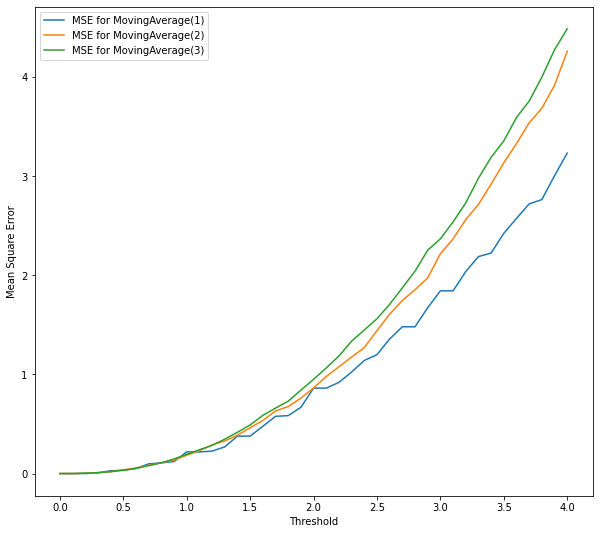

In [45]:
plt.figure(figsize=(10,9))
plt.xlabel('Threshold')
plt.ylabel('Mean Square Error')
plt.plot(threshold, y_axis_mse_1, label='MSE for MovingAverage(1)')
plt.plot(threshold, y_axis_mse_2, label='MSE for MovingAverage(2)')
plt.plot(threshold, y_axis_mse_3, label='MSE for MovingAverage(3)')
plt.legend()
plt.show()